Name: YEMNI Daoud <br>
Student id: 000437531 <br>
University: ULB

### Problem 4.4 (p. 155)
This problem is a detailed version of Exercise 4.2.
<p>
We set up an experimental framework which the reader may use to study various aspects of overfitting. The input space is $X = [-1 , 1]$ with uniform input probability density, $P(x) = \frac{1}{2}$.

<p>
We consider the two models $H_2$ and $H_{10}$. The target function is a polynomial of degree $Q_f$ , which we write as
$f(x) = \sum_{q=0}^{Q_f} a_q \cdot L_q(x)$,
    where $L_q(x)$ are the Legendre polynomials. We use the Legendre polynomials because they are a convenient orthogonal basis for the polynomials on [-1 , 1] (see Section 4.2 and Problem 4.3 for some basic information on Legendre polynomials). 
<p>    
The data set is $D = (x_1 , y_1 ) , \ldots , (x_N , Y_N )$, <br>
where $y_n = f(x_n) + \sigma_{\epsilon_n}$ and $\epsilon_n$ are iid standard Normal random variates.
    
    
For a single experiment, with specified values for $Q_f$ , $N$, $\sigma$, generate a random degree-$Q_f$ target function by selecting coefficients aq independently from a standard Normal , rescaling them so that $E_{a,x}[f^2] = 1$ . Generate a data set, selecting $x_1, . . . , x_N$ independently from P(x) and $Y_n = f(x_n) + \sigma_{\epsilon_n}$. Let $g_2$ and $g_10$ be the best fit hypotheses to the data from $H_2$ a nd $H_{10}$ respectively, with respective out of-sample errors $E_{out}(g_2)$ and $E_{out}(g_{10})$.

### (a) Why do we normalize f ?
We normalize f to avoid the overfitting of the model. The term $\sigma$ is a biased parameter apply on the linear function of the model. This value allows the model to not really fit to the desired value. Because of that biased parameter, the learning phase will not be overfit on the training set and then the model can be better.

### (b) How can we obtain $g_2$ and $g_{10}$ ?
Now the problem can be represented like a linear regression model because the $y(x)$ values are real number. Let's the target function is represented as follows :

$ y_n = w_0 \cdot L_0(x_n) + w_1 \cdot L_1(x_n) + w_2 \cdot L_2(x_n) + \sigma$

We can represent the different weighting terms $w$ and legendre terms $z$ into a multiplication of vector and we obtain : 

$ y_n = w^Tz + \sigma$

Hence, we formulate the problem into a linear regression, now let's retrieve $g$ by using the linear regression algorithm used in the Chapter 3 [p. 84-86]:
<ol>
    <li> Construct the matrix X and the vector y from the data set $(x_1, y_1), \ldots , (x_n, y_n)$ 
    <li> Compute the pseudo inverse $X^{\dagger}$. if $X^TX$ is invertible, $X^{\dagger} = (X^TX)^{-1}X^T$
    <li> then, the linear weights $w_{lin}$ is $X^\dagger y$

Hence, $g = w_{lin}^T x$

### (c) How can compute $E_{out}$ analytically for a given $g_{10}$ ?
The out-of-sample error corresponds to the level of error of the hypothesis function on new data. One of the techniques and the one used in the notebook, it is simply the mean square error. The Mean Square Error is simply to compute the mean of all distance (difference between the prediction and the correct value) power 2. 

In the notebook, we generate a set of $N$ data. With a ratio, we divide the set of data into 2 subset in each one corresponds to the training set and the second for the test set. Then, the model learn on the training set and we compute the $E_{out}$ of the model on the test set by using the MSE. 

In [1]:
import numpy as np
import scipy as sp
import matplotlib as mplot
import matplotlib.pyplot as plt
import random as rand

In [2]:
input_space = [-1, 1]
ratio = 0.7 # used to determine how to split the set of data into training and test set

In [3]:
# Function that compute the sum of the weights with Legendre Polynomial belong a degree-Qf
# using the librairy numpy to do the computation
def f(x, degree):
    # For more details about the function "legval" : 
    #ref: https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.polynomial.legendre.legval.html#numpy.polynomial.legendre.legval
    return np.polynomial.legendre.legval(x, weights)

In [4]:
# Function to compute the prediction value of the input x belongs a degree-Qf and a value sigma
def y(x, degree):
    return f(x, degree) + sigma

In [5]:
# Generate a set of data of size N
# The order of x depends on the orders of the model hypothesis (2 and 10 in our case)
def generate_data(size, degree, order):
    set_data = []
    for i in range(size):
        xi = np.random.choice(input_space, size=order)
        yi = y(xi, degree)
        set_data.append((xi, yi))
    return set_data

In [6]:
# Function that learn and fit the coefficient (weights) of the function with the training set and a degree Qf
def learn(training, degree):
    for d in training:
        x = d[0] # get the input x
        y = d[1] # get the desired value
        global weights
        # for more details about "legfit" : 
        # ref: https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.polynomial.legendre.legfit.html#numpy.polynomial.legendre.legfit
        weights = np.polynomial.legendre.legfit(x, y, degree) # learn/fit on the training set

In [7]:
# Computes the MSE (Eout) of a model with a test set and a degree-Qf
def mse(test, degree):
    distances = [] 
    for data in test:
        [x, yi] = [data[0], data[1]] # get the information of the test set
        pred = y(x, degree) # predict with the input x and the degree-Qf
        distances.append((yi - pred)**2) # Compute the square distance and add in the list
    return np.sqrt(np.mean(distances)) # Compute the sqrt of the mean of all distances

## (d) Experiments 

#### Definition of the range of the parameters
_Remark : I reduced the range of value of the parameter and the number of experiments because the experiments take too much time to be run. You can re-ajust the range and the number of experiments if you want._

In [18]:
deg_range = np.arange(1, 5) # range of possible value for degree-Qf for the experiments
N_range = np.arange(20, 40, 5) # range of value for N for the experiments
sigma_range = np.arange(0, 1, 0.05) # range of value for sigma for the experiments

Vary $Q_f, N, \sigma$ and for each combination, compute the $E_{out}(g_2)$ and $E_{out}(g_{10})$. Averages these out-of-sample errors and gives estimates of the expected value for a given scenario.

In [43]:
# Function used to run a number of experiments on a order with a combination of parameters (Qf, N, sigma)
def run_experiments(nb_experiments, order, deg, N, sigma):
    errors = []
    for i in range(nb_experiments): 
        # Generate the data with the corresponding size, degree and order
        data = generate_data(N, deg, order)

        # Generate the weights at random
        weights = np.random.random(size=deg)

        # Split the data set into a training and test set
        j = int(N * ratio)
        training = data[:j]
        test = data[j:]

        # Fit the weights to the training set
        learn(training, deg)

        # Compute and save the Eout error
        errors.append(mse(test, deg))
    return np.mean(errors)

In [44]:
g = {}
nb_experiments = 10 # default number of experiments for each combination of parameters (Qf, N, sigma)
weights = 0 # initialize the weights (will be set later, just an initialization)

# The experiments take times depending on the range of parameters and the number of experiments
# Loop over the corresponding order
for order in [2, 10]:
    # Loop over all possible degree
    for deg in deg_range:
        # Loop over all possible size of the data set
        for N in N_range:
            # Loop over all possible sigma
            for sigma in sigma_range:
                expected = run_experiments(nb_experiments, order, deg, N, sigma)
                if not order in g:
                    g[order] = []
                g[order].append(expected)

C:\Users\Genji\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RankWarning: The fit may be poorly conditioned
  if __name__ == '__main__':


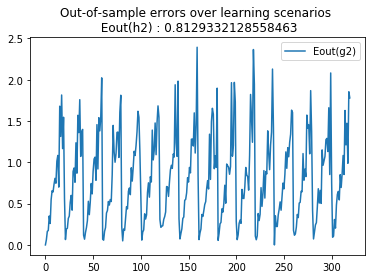

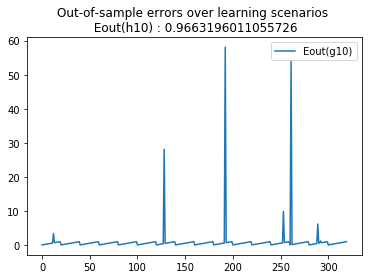

In [45]:
for key, value in g.items():
    plt.plot(np.arange(len(value)), value, label="Eout(g" + str(key) + ")")
    plt.title("Out-of-sample errors over learning scenarios \n Eout(h" + str(key) + ") : " + str(np.mean(value)))
    plt.legend(loc="best")
    plt.show()

In [46]:
overfit_measure = np.mean(g[10]) - np.mean(g[2])
print("The overfit measure is : " + str(overfit_measure))

The overfit measure is : 0.15338638824972628


#### Observations

We know from the book we can affirm that with a lower order or a better management of the parameters : the overfitting can be avoid. 

In this experiments, we tested on 2 order : 2 and 10. 

As shown in the results, the 2nd order provides a very good result and the $E_{out}$ is very low. It means that the model learn correctly and can predict. The model is trustworthiness. We can see in all combination, the out-of-sample errors are low.

For the 10th order, the results is not better than the 2nd order. The $E_{out}$ is very high. It means that the model learn too much over the training set and cannot predict properly on new data. For this case, we can suppose that the $H_{10}$ model can overfit the data but not always. We see in the plot that sometimes, the model $H_{10}$ has some good results over some combination of parameters.

The overfit meaure is positive. It means that there may be an overfitting on the model $H_{10}$. Therefore, the value of the overfit measure is low so the presence of overfitting is not too serious (can be!)

#### Discussion 

With this experiment, we prove the both affirmation. The first one say : With a lower order, the overfitting can be avoid. We can see that is true. For $H_2$, the model has good results on $E_{out}(g_2)$ and the average of the $E_{out}$ is very low and then the model can predict properly.

For the second affirmation : With a better management of parameter, the overfitting can be avoid. This affirmation is proved by the experiments on $H_{10}$. We can see that sometimes, the model $H_{10}$ is overfit over the training data because we measure a really high MSE. But not for all combination, that means there is some combination that the model $H_{10}$ does not overfit. Then, with some specific value of the parameters, even with a high order polynomial, we can avoid the overfitting. 

### (e) Use the variance to select an acceptable number of experiments

In [47]:
g = {}
weights = 0 # initialize the weights (will be set later, just an initialization)

# The experiments take times depending on the range of parameters

# Loop over the corresponding order
for order in [2, 10]:
    # Loop over all possible degree
    for deg in deg_range:
        # Loop over all possible size of the data set
        for N in N_range:
            # Loop over all possible sigma
            for sigma in sigma_range:
                # compute the variance on the value of parameters to get the number of experiments
                nb_experiments = int(np.var([deg, N, sigma]))
                expected = run_experiments(nb_experiments, order, deg, N, sigma)
                if not order in g:
                    g[order] = []
                g[order].append(expected)

C:\Users\Genji\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RankWarning: The fit may be poorly conditioned
  if __name__ == '__main__':


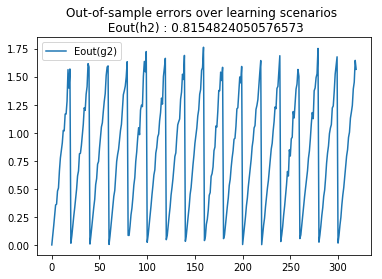

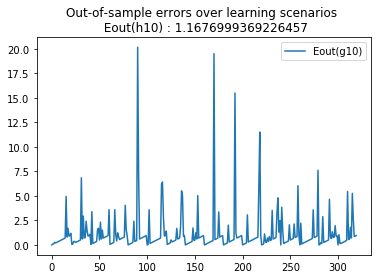

In [48]:
for key, value in g.items():
    plt.plot(np.arange(len(value)), value, label="Eout(g" + str(key) + ")")
    plt.title("Out-of-sample errors over learning scenarios \n Eout(h" + str(key) + ") : " + str(np.mean(value)))
    plt.legend(loc="best")
    plt.show()

In [49]:
overfit_measure = np.mean(g[10]) - np.mean(g[2])
print("The overfit measure is : " + str(overfit_measure))

The overfit measure is : 0.3522175318649884


We keep to observe a same kind of behavior than the previous point. 

The model $H_{10}$ sometimes is overfit over the training set and has some high $E_{out}$. In comparison with the model $H_{2}$ in which keep a good learning and testing phase and continue to predict well.

## References

<ol>
    <li> Yaser S. Abu-Mostafa, Malik Magdon-Ismail and Hsuan-Tien Lin - _Learning From Data_ - Chapter 3-4
    <li> INFO-F422 Statistical Foundation of Machine Learning Slides (11-12) - Université Libre de Bruxelles 
    <li> Yaser Abu-Mostafa - Machine Learning Video Library - https://work.caltech.edu/library/110.html